##QUESTIONS on EDA (EDA-4: Spotify Dataset)

Que1: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

Saving spotify.csv to spotify (1).csv
Null values per column before cleanup:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


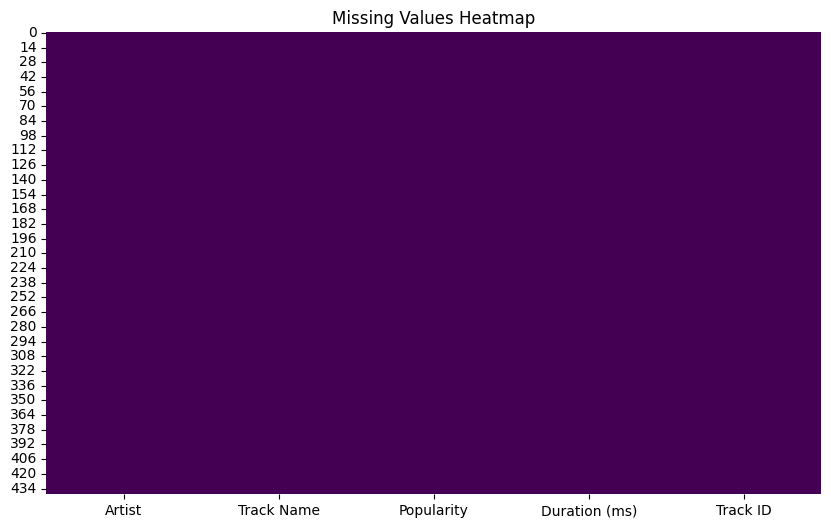

Number of duplicate rows: 27

After cleanup:
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB
None


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

df = pd.read_csv("spotify.csv")

# Display null value counts before cleanup
print("Null values per column before cleanup:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Drop rows with any null values
df.dropna(inplace=True)

# Check and handle duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

print("\nAfter cleanup:")
print(df.info())


Que2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

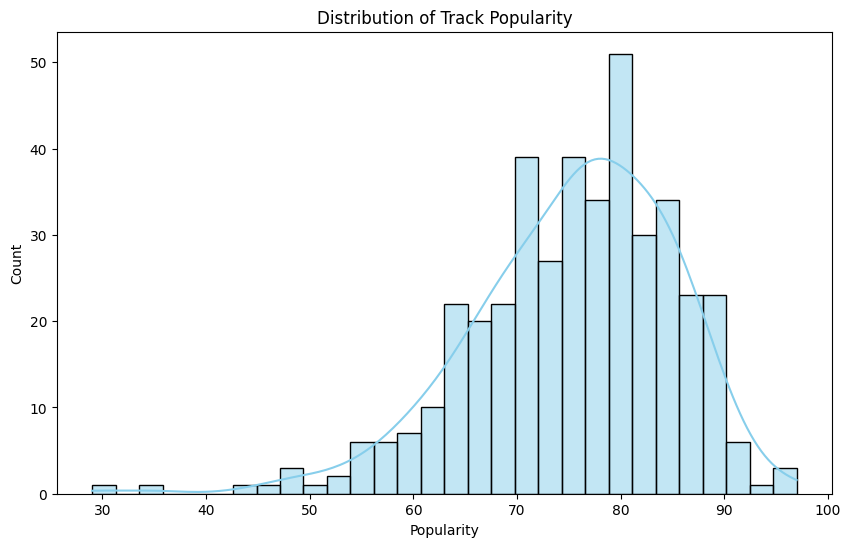

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

Que3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

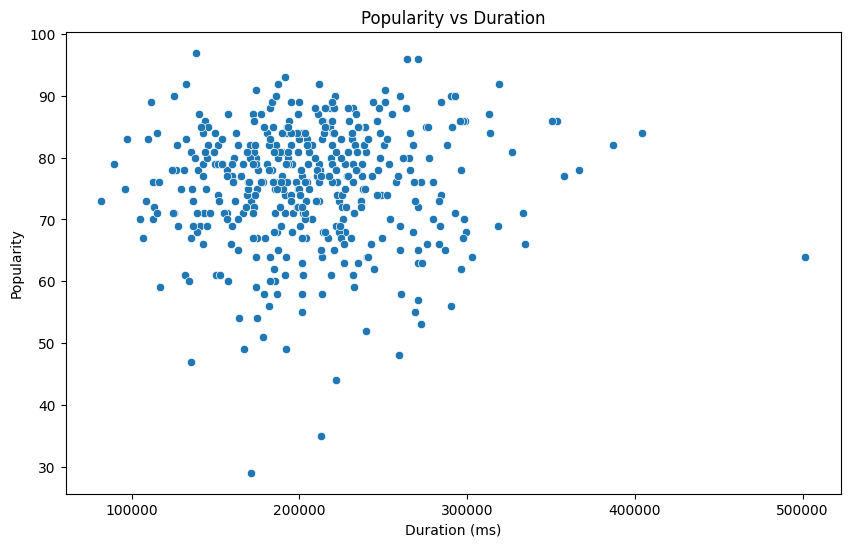

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

Que4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

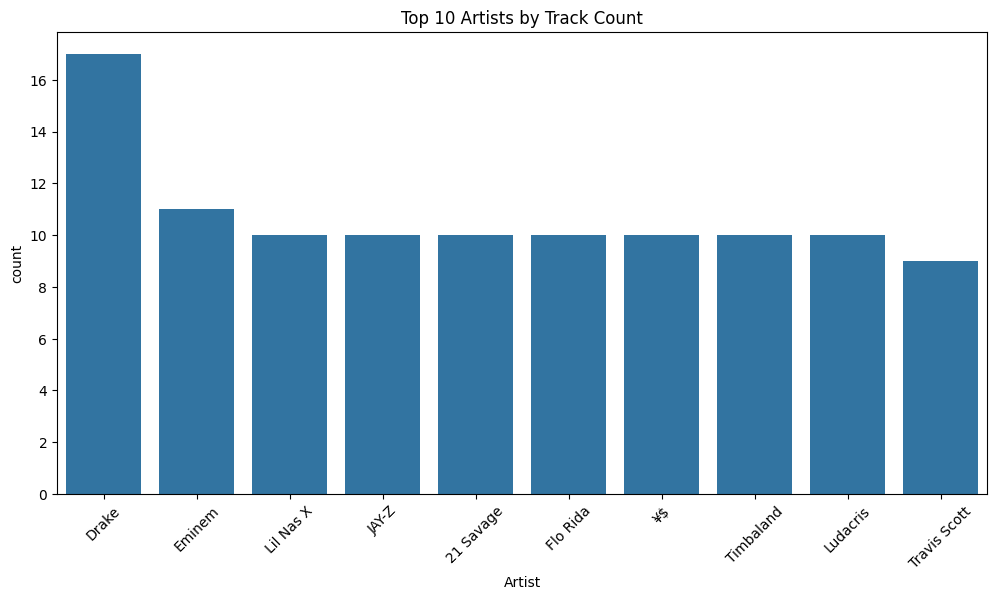

In [5]:
plt.figure(figsize=(12,6))
top_artists = df['Artist'].value_counts().head(10)
sns.countplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', order=top_artists.index)
plt.title('Top 10 Artists by Track Count')
plt.xticks(rotation=45)
plt.show()

Que5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [7]:
least_popular = df.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
print(least_popular)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Que6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [6]:
top_artists_by_tracks = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_artists_by_tracks)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity)

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


Que7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [8]:
top_artists_by_tracks = df['Artist'].value_counts().head(5).index
most_popular_tracks = df[df['Artist'].isin(top_artists_by_tracks)].sort_values(['Artist', 'Popularity'], ascending=[True, False])
result = most_popular_tracks.groupby('Artist').first()[['Track Name', 'Popularity']]
print(result)

                                        Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


Que8: Visualize relationships between multiple numerical variables simultaneously using a pair plot.

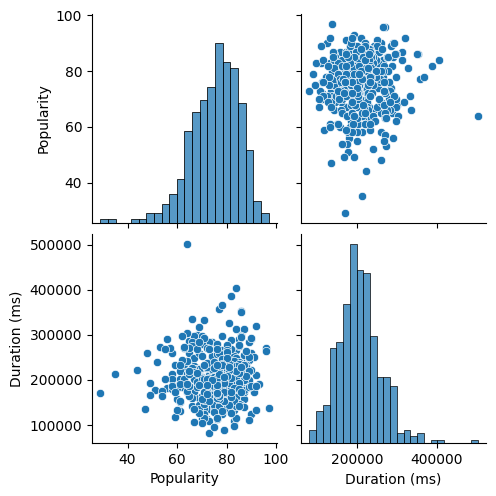

In [9]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

Que9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

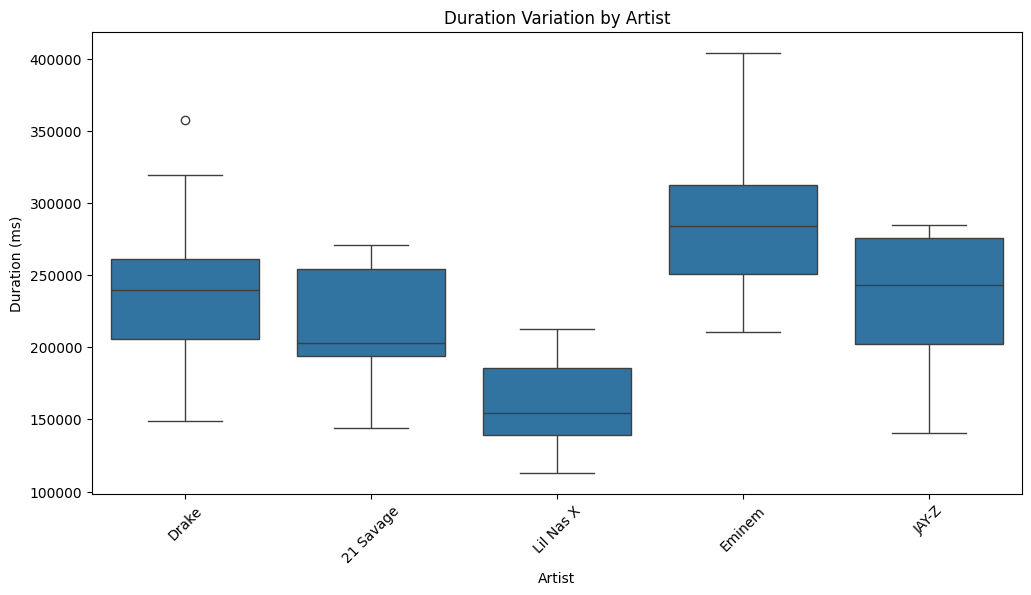

In [10]:
top_artists = df['Artist'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)')
plt.title('Duration Variation by Artist')
plt.xticks(rotation=45)
plt.show()

Que10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

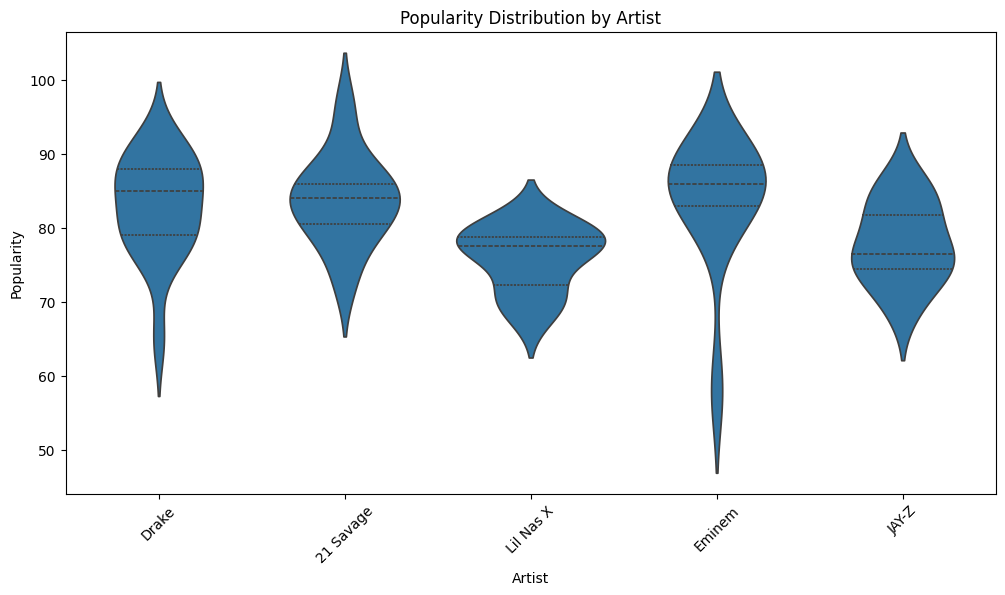

In [11]:
top_artists = df['Artist'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity', inner='quart')
plt.title('Popularity Distribution by Artist')
plt.xticks(rotation=45)
plt.show()